## Wine_Quality_Analysis

### First, import the red wine csv file into a pandas dataframe from the following website:  
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/  
**(Note: you need to adjust the argument for read_csv() from sep=',' to sep=';')**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep = ';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Use the wine quality data set to answer the following questions. Present any figures that assist you in your analysis:

### 1. Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.)

In [3]:
#Firstly, we need to scale the original dataset
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(red) 
X_scaled = scaler.transform(red)

Text(0, 0.5, 'silhouette Score')

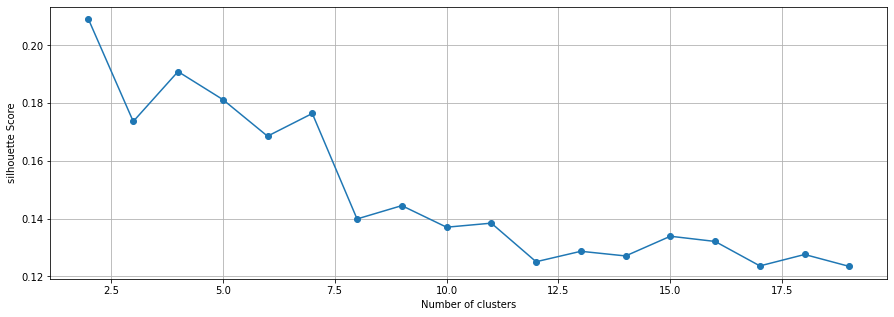

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil = []
kmax = 19

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(X_scaled, labels, metric = 'euclidean'))

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), sil, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('silhouette Score')


### Conclusion: When cluster(which means k=2), the model is optimal.

In [5]:
#Use the kmean
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)
y_kmeans = kmeans.fit_predict(X_scaled)

In [6]:
# means for full scaled data
X = pd.DataFrame(X_scaled, index = red.index, columns = red.columns)
X['cluster'] = kmeans.labels_
display(X.groupby('cluster').mean()) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,0.887405,-0.731428,0.996236,0.126634,0.232428,-0.179628,-0.246302,0.390812,-0.676331,0.565789,0.289388,0.461453
1,-0.510586,0.420842,-0.573204,-0.072861,-0.133732,0.103352,0.141714,-0.224861,0.389140,-0.325538,-0.166505,-0.265506


#### Describe variables that cluster with higher values of wine quality.

- From my perspective, cluster with higher values of wine quality has higher(positive) fixed acidity, citric acid, residual sugar, chlorides, density, sulphates and alcohol as well as lower(negative) volatile acidity, free sulfur dioxide, total sulfur dioxide and pH.

#### Describe variables that cluster with lower values of wine quality.

- From my perspective, cluster with lower values of wine quality has higher(positive) volatile acidity, free sulfur dioxide, total sulfur dioxide and pH as well as lower(negative) fixed acidity, citric acid, residual sugar, chlorides, density, sulphates and alcohol. 

#### If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?

In [7]:
m = X.groupby('cluster').mean()
diff = m.iloc[0,:] - m.iloc[1,:]
print(diff)

fixed acidity           1.397991
volatile acidity       -1.152270
citric acid             1.569440
residual sugar          0.199495
chlorides               0.366159
free sulfur dioxide    -0.282980
total sulfur dioxide   -0.388016
density                 0.615673
pH                     -1.065472
sulphates               0.891326
alcohol                 0.455894
quality                 0.726960
dtype: float64


- According to this analysis, if I want to make a good bottle of wine, **fixed acidity, volatile acidity, citric acid and pH** are most important, and if I need to choose one most important characteristic, it should be **citric acid** since it has the largest difference between high quality wine and low quality wine.

### 2. Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.

In [8]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X_scaled)

In [9]:
X1 = pd.DataFrame(X_scaled, index = red.index, columns = red.columns)
X1['cluster'] = ac.labels_
display(X1.groupby('cluster').mean()) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.000094,0.000440,-0.003917,-0.000054,-0.013922,-0.000494,-0.000401,-0.000965,0.003336,-0.007182,0.001203,0.001762
1,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158


#### Describe variables that cluster with higher values of wine quality.

- From my perspective, cluster with higher values of wine quality has higher(positive) volatile acidity, pH and alcohol as well as lower(negative) fixed acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density and sulphates.

#### Describe variables that cluster with lower values of wine quality.

- From my perspective, cluster with higher values of wine quality has lower(negative) volatile acidity, pH and alcohol as well as higher(positive) fixed acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density and sulphates.

#### If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.

In [10]:
m2 = X1.groupby('cluster').mean()
diff2 = m2.iloc[0,:] - m2.iloc[1,:]
print(diff2)

fixed acidity           -0.074991
volatile acidity         0.351385
citric acid             -3.131285
residual sugar          -0.043471
chlorides              -11.130329
free sulfur dioxide     -0.394978
total sulfur dioxide    -0.320675
density                 -0.771245
pH                       2.667053
sulphates               -5.742375
alcohol                  0.961449
quality                  1.408920
dtype: float64


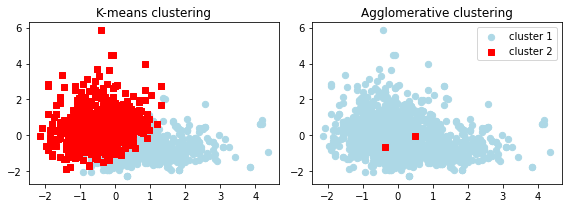

In [11]:
from sklearn.cluster import KMeans

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2)
y_km = km.fit_predict(X_scaled)
ax1.scatter(X_scaled[y_km == 0, 0], X_scaled[y_km == 0, 1],
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X_scaled[y_km == 1, 0], X_scaled[y_km == 1, 1],
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X_scaled)
ax2.scatter(X_scaled[y_ac == 0, 0], X_scaled[y_ac == 0, 1], c='lightblue',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X_scaled[y_ac == 1, 0], X_scaled[y_ac == 1, 1], c='red',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()

- According to this analysis, if I want to make a good bottle of wine, **citric acid, chlorides, pH and sulphates** are most important, and if I need to choose one most important characteristic, it should be **chlorides** since it has the largest difference between high quality wine and low quality wine.  
- My conclusions **change** as for the characteristics of higher and lower values of wine as well as the most important characteristic using hierarchical clustering rather than k means clustering.  

### Summary:
Similarity:  
- Both K-Means and Hierarchical clustering allow us to directly specify the number of desired clusters.
- They both can be used on large, real-world datasets, are relatively easy to understand, and allow for clustering into many clusters.  

Difference:  
- K-Means allows for a characterization of the clusters using the cluster means. It can also be viewed as a decomposition method, where each data point is represented by its cluster center.
- Hierarchical clustering can provide a whole hierarchy of possible partitions of the data, which can be easily inspected via dendrograms.  

### 3. Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components. How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

In [12]:
from sklearn.decomposition import PCA

X2 = pd.DataFrame(X_scaled, index=red.index, columns=red.columns)
pca = PCA(n_components = 2).fit(X2)
X_pca = pca.transform(X2)
print("original shape:   ", X2.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1599, 12)
transformed shape: (1599, 2)


In [13]:
pca.explained_variance_

array([3.12312087, 2.24328497])

In [14]:
pca.explained_variance_ratio_

array([0.26009731, 0.1868235 ])

In [15]:
print(0.26009731+0.1868235)

0.44692081000000006


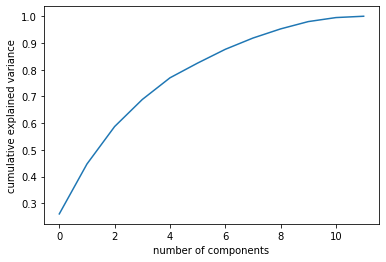

In [16]:
pca = PCA().fit(X2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

- Around 44.7% of the variation in your data is explained by the first two principal components.
- We could use the two components as the X, some other variables tied to wine as the y, then split the X, y into training set and testing set. Then choose suitable models to do supervised learning on it.